In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [27]:
df = pd.read_csv("./data/종합_독서율__성인_20250610121343.csv", index_col = ["통계분류(1)", "통계분류(2)"])

In [11]:
df

2019    2019.1    2019.2  2021    2021.1    2021.2  \
통계분류(1) 통계분류(2)                                                            
통계분류(1) 통계분류(2)        사례수  독서한 적 있음  독서한 적 없음   사례수  독서한 적 있음  독서한 적 없음   
전체      소계            6000      55.7      44.3  6000      47.5      52.5   
성별      남성            2990      55.1      44.9  2991      48.1      51.9   
        여성            3010      56.3      43.7  3009      46.9      53.1   
연령별     19~29세        1057      77.8      22.2  1016      78.1      21.9   
        20대 이하           -         -         -     -         -         -   
        30~39세        1022      75.3      24.7   964      68.8      31.2   
        30대              -         -         -     -         -         -   
        40~49세        1158      60.9      39.1  1123      49.9      50.1   
        40대              -         -         -     -         -         -   
        50~59세        1192      44.9      55.1  1173      35.7      64.3   
        50대              -         -         -     -         -         -   
        60세 이상        1571      32.4      67.6  1724      23.8      76.2   
        60대 이상           -         -         -     -         -         -   
학력별     중졸 이하          934      20.9      79.1   900      12.2      87.8   
        고졸 고퇴         2127      41.8      58.2  2136        32        68   
        대재 이상         2939      76.8      23.2  2964      69.2      30.8   
월평균가구소득 200만원 미만       954      29.9      70.1   715      20.4      79.6   
        200~300만원 미만   920      47.9      52.1   888      31.3      68.7   
        300~400만원 미만  1515      54.5      45.5  1412      45.2      54.8   
        400~500만원 미만  1290      61.9      38.1  1521      54.4      45.6   
        500만원 이상      1321      75.1      24.9  1464      65.4      34.6   

                      2023    2023.1    2023.2  
통계분류(1) 통계분류(2)                                 
통계분류(1) 통계분류(2)        사례수  독서한 적 있음  독서한 적 없음  
전체      소계            5000        43        57  
성별      남성            2485      42.6      57.4  
        여성            2515      43.4      56.6  
연령별     19~29세           -         -         -  
        20대 이하         789      74.5      25.5  
        30~39세           -         -         -  
        30대            772        68        32  
        40~49세           -         -         -  
        40대            905      47.9      52.1  
        50~59세           -         -         -  
        50대            973      36.9      63.1  
        60세 이상           -         -         -  
        60대 이상        1560      15.7      84.3  
학력별     중졸 이하          642       7.4      92.6  
        고졸 고퇴         1772      23.4      76.6  
        대재 이상         2586      65.3      34.7  
월평균가구소득 200만원 미만       373       9.8      90.2  
        200~300만원 미만   580      27.7      72.3  
        300~400만원 미만   961      36.1      63.9  
        400~500만원 미만  1041      46.7      53.3  
        500만원 이상      2046      54.7      45.3

# 연령별 데이터 전처리

In [34]:
age_df = df[4:9]
age_df

2019 2019.1 2019.2  2021 2021.1 2021.2  2023 2023.1 2023.2
통계분류(1) 통계분류(2)                                                            
연령별     19~29세   1057   77.8   22.2  1016   78.1   21.9   789   74.5   25.5
        30~39세   1022   75.3   24.7   964   68.8   31.2   772     68     32
        40~49세   1158   60.9   39.1  1123   49.9   50.1   905   47.9   52.1
        50~59세   1192   44.9   55.1  1173   35.7   64.3   973   36.9   63.1
        60세 이상   1571   32.4   67.6  1724   23.8   76.2  1560   15.7   84.3

In [36]:
age_df.shape

(5, 9)

In [38]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5 entries, ('연령별', '19~29세') to ('연령별', '60세 이상')
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2019    5 non-null      object
 1   2019.1  5 non-null      object
 2   2019.2  5 non-null      object
 3   2021    5 non-null      object
 4   2021.1  5 non-null      object
 5   2021.2  5 non-null      object
 6   2023    5 non-null      object
 7   2023.1  5 non-null      object
 8   2023.2  5 non-null      object
dtypes: object(9)
memory usage: 1.4+ KB


In [40]:
age_df = age_df.astype(float)
age_df

2019  2019.1  2019.2    2021  2021.1  2021.2    2023  \
통계분류(1) 통계분류(2)                                                           
연령별     19~29세   1057.0    77.8    22.2  1016.0    78.1    21.9   789.0   
        30~39세   1022.0    75.3    24.7   964.0    68.8    31.2   772.0   
        40~49세   1158.0    60.9    39.1  1123.0    49.9    50.1   905.0   
        50~59세   1192.0    44.9    55.1  1173.0    35.7    64.3   973.0   
        60세 이상   1571.0    32.4    67.6  1724.0    23.8    76.2  1560.0   

                 2023.1  2023.2  
통계분류(1) 통계분류(2)                  
연령별     19~29세     74.5    25.5  
        30~39세     68.0    32.0  
        40~49세     47.9    52.1  
        50~59세     36.9    63.1  
        60세 이상     15.7    84.3

In [42]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5 entries, ('연령별', '19~29세') to ('연령별', '60세 이상')
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2019    5 non-null      float64
 1   2019.1  5 non-null      float64
 2   2019.2  5 non-null      float64
 3   2021    5 non-null      float64
 4   2021.1  5 non-null      float64
 5   2021.2  5 non-null      float64
 6   2023    5 non-null      float64
 7   2023.1  5 non-null      float64
 8   2023.2  5 non-null      float64
dtypes: float64(9)
memory usage: 1.4+ KB


# 연령대 데이터 시각화

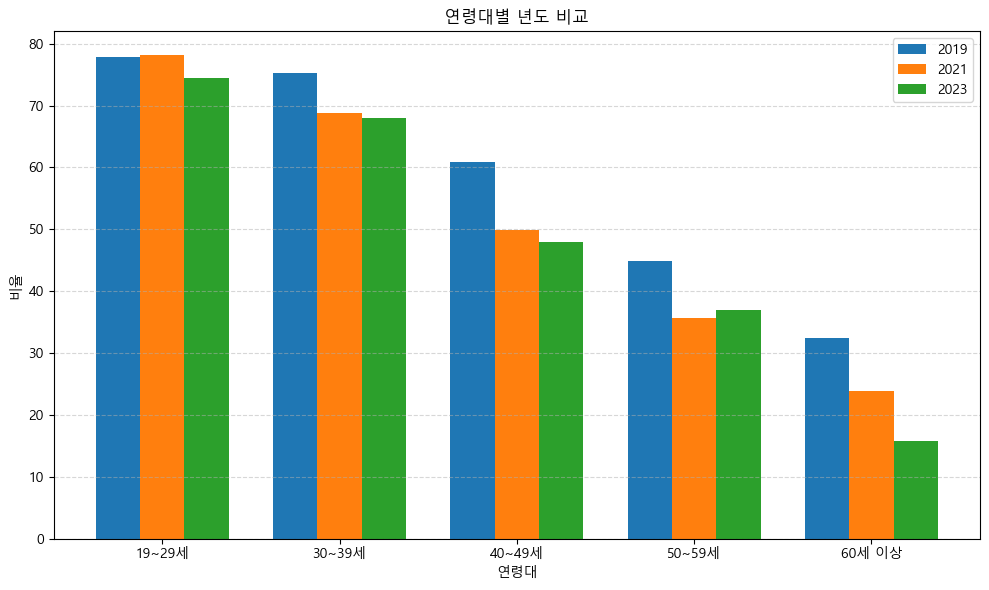

In [46]:
# 데이터 준비
data = {
    '연령별': ['19~29세', '30~39세', '40~49세', '50~59세', '60세 이상'],
    '2019': [77.8, 75.3, 60.9, 44.9, 32.4],
    '2021': [78.1, 68.8, 49.9, 35.7, 23.8],
    '2023': [74.5, 68.0, 47.9, 36.9, 15.7]
}

df = pd.DataFrame(data)

# 시각화 설정
x = np.arange(len(df['연령별']))  # 연령대 개수
width = 0.25  # 막대 너비

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x - width, df['2019'], width, label='2019')
plt.bar(x, df['2021'], width, label='2021')
plt.bar(x + width, df['2023'], width, label='2023')

# 라벨 및 제목
plt.xlabel('연령대')
plt.ylabel('비율')
plt.title('연령대별 년도 비교')
plt.xticks(x, df['연령별'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()